In [79]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import numpy as np

In [26]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [4]:
Measurement = Base.classes.measurements

In [5]:
Station = Base.classes.stations

In [6]:
session = Session(engine)

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [8]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c['type'])

measurement_ID INTEGER
station VARCHAR
date TEXT
prcp FLOAT
tobs INTEGER


In [9]:
same_station = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()

for record in same_station:
    (measurements, stations) = record
    print(record)
    

(<sqlalchemy.ext.automap.measurements object at 0x000001937C6EC438>, <sqlalchemy.ext.automap.stations object at 0x000001937C6EC5F8>)
(<sqlalchemy.ext.automap.measurements object at 0x000001937C6EC390>, <sqlalchemy.ext.automap.stations object at 0x000001937C6EC5F8>)
(<sqlalchemy.ext.automap.measurements object at 0x000001937C6EC3C8>, <sqlalchemy.ext.automap.stations object at 0x000001937C6EC5F8>)
(<sqlalchemy.ext.automap.measurements object at 0x000001937C41DC88>, <sqlalchemy.ext.automap.stations object at 0x000001937C6EC5F8>)
(<sqlalchemy.ext.automap.measurements object at 0x000001937C41DCF8>, <sqlalchemy.ext.automap.stations object at 0x000001937C6EC5F8>)
(<sqlalchemy.ext.automap.measurements object at 0x000001937C41DD68>, <sqlalchemy.ext.automap.stations object at 0x000001937C6EC5F8>)
(<sqlalchemy.ext.automap.measurements object at 0x000001937C41DE10>, <sqlalchemy.ext.automap.stations object at 0x000001937C6EC5F8>)
(<sqlalchemy.ext.automap.measurements object at 0x000001937C41DEB8>, 

In [11]:
#Honolulu precipitation data for 12 months
honolulu = session.query(Station).filter(Station.name == 'HONOLULU OBSERVATORY 702.2, HI US').all()
for city_id in honolulu:
    print("Station: {0}, Name: {1}".format(city_id.station, city_id.name))

Station: USC00511918, Name: HONOLULU OBSERVATORY 702.2, HI US


In [12]:
import datetime as dt

In [14]:
query_begin_date = session.query(Measurement.date).order_by(Measurement.date.desc()).filter (Measurement.station =='USC00511918').first()

('2015-10-30')

In [25]:
date_str = "30"
year_honolulu_dates = session.query(Measurement.date).\
    filter(func.strftime("%d", Measurement.date) == date_str).order_by(Measurement.date.desc()).filter (Measurement.station =='USC00511918').limit(12).all()
year_honolulu_dates

[('2015-10-30'),
 ('2015-04-30'),
 ('2015-01-30'),
 ('2014-12-30'),
 ('2014-11-30'),
 ('2014-10-30'),
 ('2014-09-30'),
 ('2014-08-30'),
 ('2014-07-30'),
 ('2014-06-30'),
 ('2014-05-30'),
 ('2014-04-30')]

In [31]:
results = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).filter(Measurement.station =='USC00511918').limit(6).all()
results

[('2015-10-30', 0.0),
 ('2015-10-29', 0.0),
 ('2015-10-28', 0.0),
 ('2015-10-26', 0.1),
 ('2015-10-25', 0.0),
 ('2015-10-22', 0.15)]

In [32]:
Date = [result[0] for result in results[:6]]
prcp = [int(result[1]) for result in results[:6]]

<IPython.core.display.Javascript object>


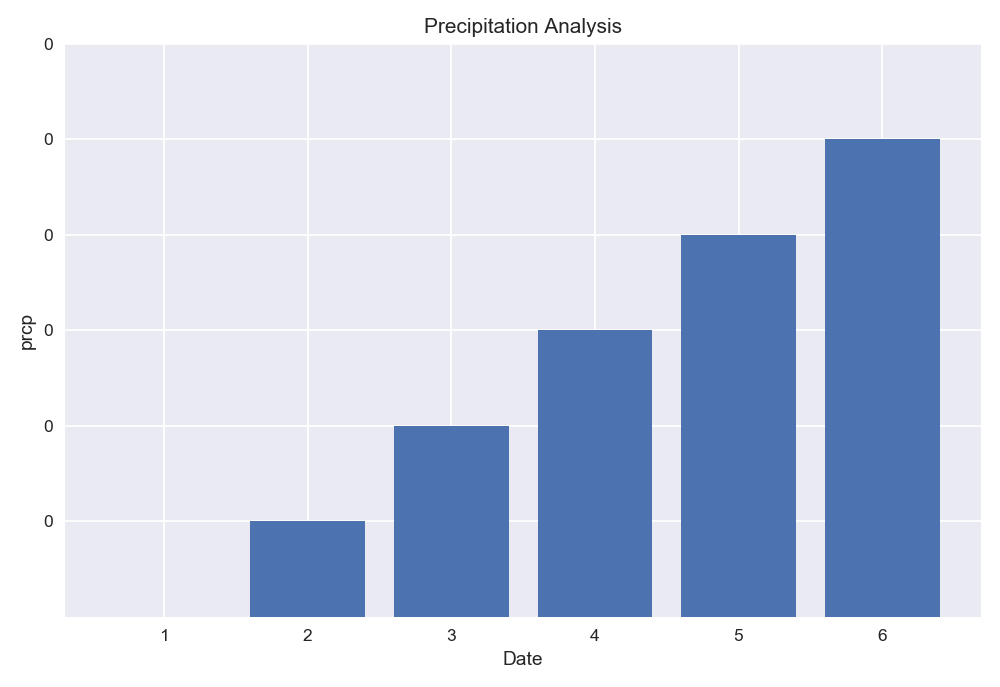

In [41]:
fig, ax = plt.subplots()
ypos = range(1,len(prcp)+1)
ax.bar(ypos, Date[::-1])
ax.set_ylabel("prcp")
ax.set_xlabel("Date")
ax.set_yticks(ypos)
ax.set_yticklabels(prcp[::-1])
ax.set_title("Precipitation Analysis")
fig.tight_layout()
fig.show()

In [55]:
stations_count= session.query(Measurement.station).group_by(Measurement.station).count()
print( stations_count)

9


In [61]:
station_tobs= session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
           order_by(func.count(Measurement.date).desc()).all()
print(station_tobs)

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


In [67]:
highest_tobcount_city = session.query(Station).filter(Station.station == 'USC00519281').all()
for station_name in highest_tobcount_city:
    print("The station that has highest temparature observation count is: {1}".format(station_name.station, station_name.name))

The station that has highest temparature observation count is: WAIHEE 837.5, HI US


In [69]:
tob_results = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
           order_by(func.count(Measurement.date).desc()).all()
tob_results

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [70]:
station_id = [result[0] for result in tob_results[:9]]
date_count = [int(result[1]) for result in tob_results[:9]]

<IPython.core.display.Javascript object>


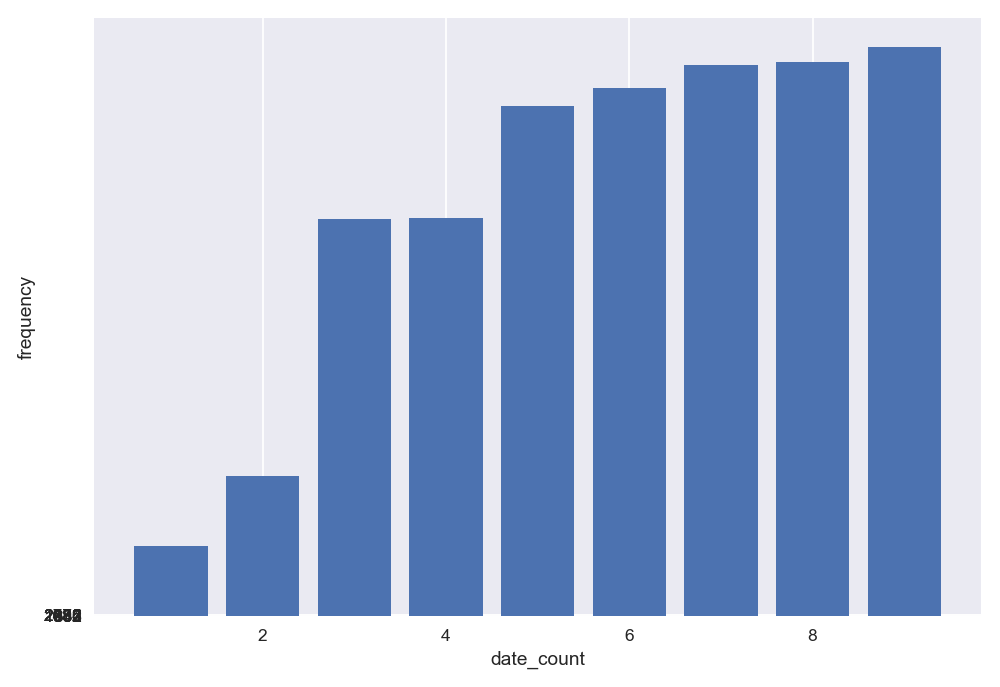

In [73]:
fig, ax = plt.subplots()
ypos = range(1, len(date_count)+1)
ax.bar(ypos, date_count[::-1])
ax.set_xlabel("date_count")
ax.set_ylabel("frequency")
ax.set_yticks(ypos)
ax.set_yticklabels(date_count[::-1])
fig.tight_layout()
fig.show()

In [80]:
start_date = dt.datetime(2017, 1, 1)
end_date = dt.datetime(2018, 1, 1)
calc_temps = session.query(func.max(Measurement.tobs), func.avg(Measurement.tobs), func.min(Measurement.tobs)).\
                           filter(Measurement.date > start_date).filter(Measurement.date < end_date).all()
ptps = list(np.ravel(calc_temps))
ptps

[87.0, 74.04278922345483, 58.0]

<IPython.core.display.Javascript object>


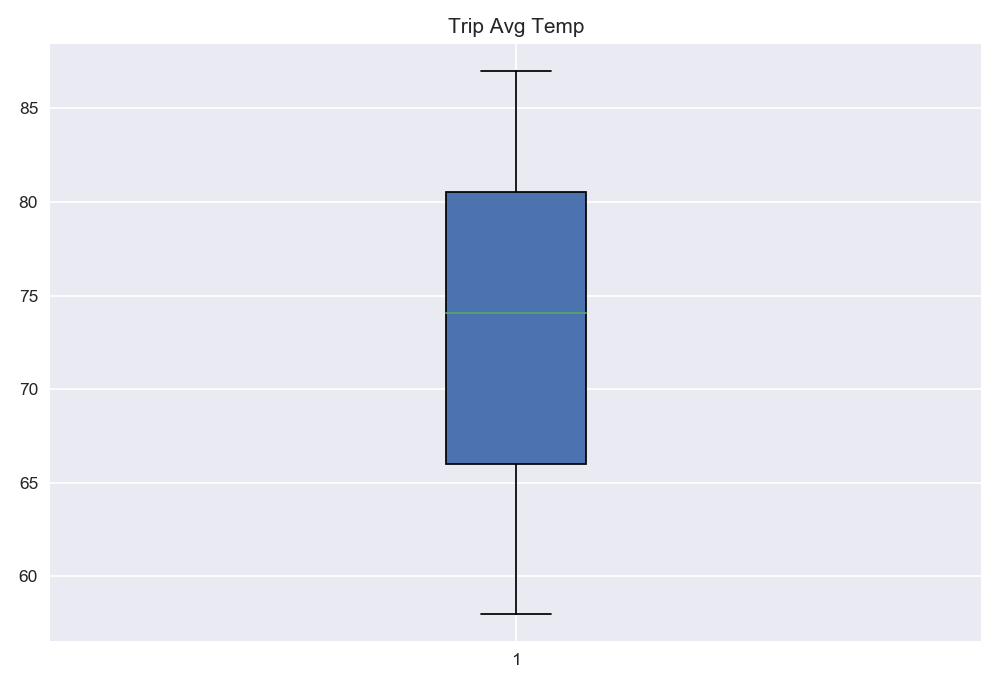

In [81]:
fig, ax = plt.subplots()

x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True)
ax.set_title('Trip Avg Temp')
fig.tight_layout()
fig.show()